# Sensor data simulator in a smart home

We refered to and borrowed some parts of a simulator of [1, 2].  
[1] C. Jiang and A. Mita, "Sisg4hei alpha: Alpha version of simulated indoor scenario generator for houses with elderly individuals." Journal of Building Engineering, 35-101963 (2021).  
[2] https://github.com/Idontwan/SISG4HEI_Alpha

# Import libraries

In [1]:
import os
import pprint
import scipy.stats
import time
from copy import deepcopy
from pathlib import Path
from datetime import timedelta

import matplotlib.pyplot as plt
import numpy as np

# self-made
import src.activity_model as activity_model
import src.analysis as analysis
import src.anomaly_model as anomaly_model
import src.floor_plan as floor_plan

import src.utils as utils
import src.sensor_model as sensor_model

working_path = Path().resolve()
layout_data_path = working_path / "layout_data"

# Generate a new layout data, height data, and information for path generation.

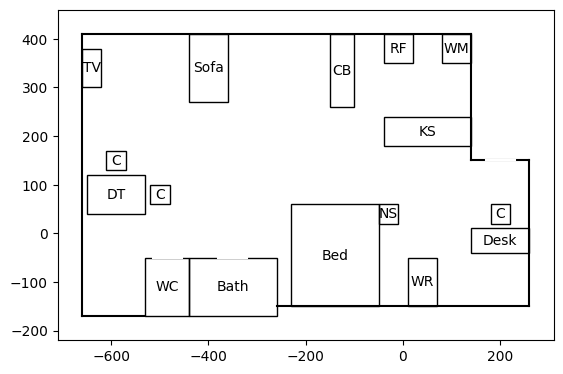

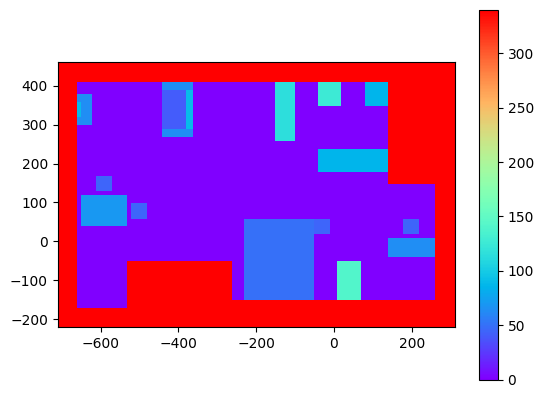

A floor plan was generated in (17.466599225997925[s])!
The path is C:\Users\tanakai\Documents\git\Simulator\layout_data\2023_08_22_11_18_23


In [14]:
temp_time = time.time()

fp = floor_plan.FloorPlan()

necessary_furniture = [
    "Bed",
    "Wardrobe",
    "Desk",
    "Kitchen_Stove",
    "Refrigerator",
    "Sofa",
    "TV",
    "Dinner_Table",
    "Entrance",
    "Toilet_Door",
    "Bathroom_Door",
]
# necessary_furniture = ['Bed', 'Wardrobe', 'Desk', 'Kitchen_Stove', 'Refrigerator', 'Sofa', 'TV', 'Dinner_Table', 'Wash_Machine', 'Trash_Bin', 'Entrance', 'Toilet_Door', 'Bathroom_Door']

# path = fp.generate_layout(layout_data_path, error_message = True)  # no constraints of furniture
path = fp.generate_layout_with_necessary_furniture(
    layout_data_path, necessary_furniture=necessary_furniture
)
if path == None:
    raise ValueError("Failed to generate a layout.")
fp.sample_height_data(path)
fp.save_layout_figure(path, show=True)
fp.save_height_figure(path, show=True)
fp.save_distance(path)

print(
    "A floor plan was generated in ({}[s])!\nThe path is {}".format(
        time.time() - temp_time, path
    )
)

## Explain floor plan simulator in detail step by step

### Generate a new layout and save it as a json file

In [16]:
# no constrains of furniture
fp = floor_plan.FloorPlan()
path = fp.generate_layout(layout_data_path)
print(path)

C:\Users\tanakai\Documents\git\Simulator\layout_data\2023_08_22_11_19_30


In [17]:
# specify the furniture that must be included
fp = floor_plan.FloorPlan()
necessary_furniture = [
    "Bed",
    "Wardrobe",
    "Desk",
    "Kitchen_Stove",
    "Refrigerator",
    "Sofa",
    "TV",
    "Dinner_Table",
    "Entrance",
    "Toilet_Door",
    "Bathroom_Door",
]
path = fp.generate_layout_with_necessary_furniture(
    layout_data_path, necessary_furniture=necessary_furniture
)
if path == None:
    raise ValueError("cannnot make the layout")
print(path)

C:\Users\tanakai\Documents\git\Simulator\layout_data\2023_08_22_11_20_17


### Load and save the layout

In [18]:
path = Path(layout_data_path / "test_layout")  # test_layout
fp = floor_plan.FloorPlan()
fp.load_layout(path)

print(fp.House)
print(fp.Furnitures)

path = fp.save_layout_data(path)

[[-190, -210, 380, 420, 'Bedroom'], [690, -90, 320, 300, 'Kitchen'], [190, -210, 500, 420, 'Livingroom']]
[[[-190, 0, 150, 210, 'Bed'], [-190, -165, 120, 60, 'Wardrobe'], [40, -200, 50, 120, 'Desk'], [100, -160, 40, 40, 'Desk_Chair']], [[950, 30, 60, 180, 'Kitchen_Stove'], [720, -90, 50, 120, 'Cupboard'], [830, -90, 60, 60, 'Refrigerator'], [830, 150, 60, 60, 'Wash_Machine'], [720, 150, 30, 60, 'Trash_Bin']], [[250, -90, 140, 80, 'Sofa'], [280, 170, 80, 40, 'TV'], [515, 90, 80, 120, 'Dinner_Table'], [605, 130, 40, 40, 'Dinner_Table_Chair'], [535, 40, 40, 40, 'Dinner_Table_Chair']]]


### Sample a height data and save it

In [19]:
path = Path(layout_data_path / "test_layout")
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.sample_height_data(path)

### Load a layout data and save the figures

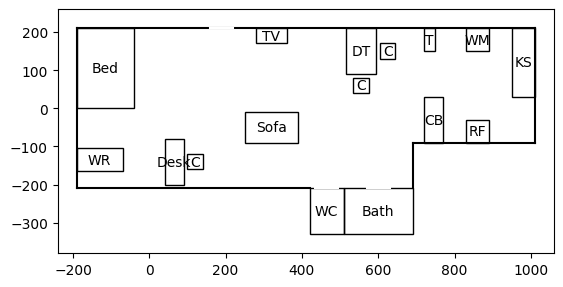

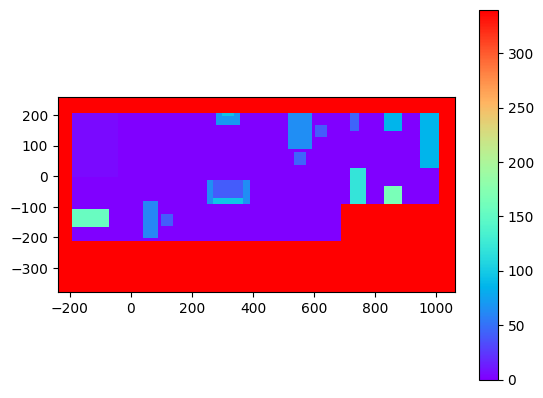

In [20]:
path = Path(layout_data_path / "test_layout")
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.load_height(path)
fp.save_layout_figure(path, show=True)
fp.save_height_figure(path, show=True)

### Generate information for path generation, including 2D array of distance.

In [21]:
fp = floor_plan.FloorPlan()
path = Path(layout_data_path / "test_layout")
fp.load_layout(path)
fp.load_height(path)
fp.save_distance(path)
print([x.name for x in list(path.iterdir())])  # files in the path

['2023_07_21_21_11_00', '2023_07_21_21_23_35', 'Bathroom_Door_distance.csv', 'Bed_distance.csv', 'Chair_distance.csv', 'Cupboard_distance.csv', 'Desk_Chair_distance.csv', 'Desk_distance.csv', 'Destinations.json', 'Dinner_Table_Chair_distance.csv', 'Dinner_Table_distance.csv', 'Discomfortable_value.csv', 'Entrance_distance.csv', 'Height_Function.json', 'Height_Function.png', 'Kitchen_Stove_distance.csv', 'Layout.png', 'Layout_PIR_pressure.png', 'Layout_PIR_pressure_cost.png', 'Max_Distances.json', 'Refrigerator_distance.csv', 'Semantic.json', 'Sofa_distance.csv', 'test_data_1', 'test_data_1.zip', 'test_data_2', 'test_data_2.zip', 'Toilet_Door_distance.csv', 'Trash_Bin_distance.csv', 'TV_distance.csv', 'Wardrobe_distance.csv', 'Wash_Machine_distance.csv']


### Modify a layout data, e.g., change the furniture name.

In [22]:
path = Path(layout_data_path / "test_layout")
fp = floor_plan.FloorPlan()
fp.load_layout(path)
fp.Furnitures[0][3][4] = "Desk_Chair"
# fp.save_layout_data(layout_data_path)

# Generate an activity sequence

## Load a layout data to consider possible activities in the layout, then make an activity sequence

An activity sequence was generated in 0.011089563369750977[s]!
0 <ActivityDataPoint> <Activity>Sleep from 0:00:00 to 5:04:32.351842 at Bed
1 <ActivityDataPoint> <Activity>Clean from 5:04:32.351842 to 5:17:41.074499 at Trash_Bin
2 <ActivityDataPoint> <Activity>Urination from 5:17:41.074499 to 5:20:19.683749 at Toilet_Door
3 <ActivityDataPoint> <Activity>Take a snack from 5:20:19.683749 to 5:29:50.865931 at Dinner_Table_Chair
4 <ActivityDataPoint> <Activity>Urination from 5:29:50.865931 to 5:31:37.295543 at Toilet_Door


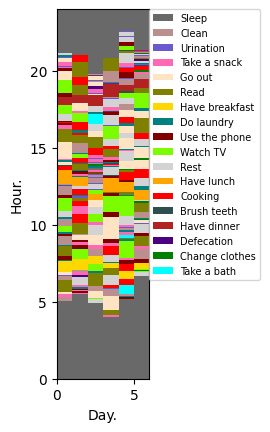

The activity sequence was saved as a text and figures in 8.45717191696167[s]


In [23]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(
    path, utils.present_date_and_time()
)  # create a folder to save data
start_day, end_day = 0, 6
AS = utils.generate_activity_sequence(
    start_day, end_day, path, original_act_model=activity_model.basic_activity_model
)
print("An activity sequence was generated in {}[s]!".format(time.time() - temp_time))
for i, x in enumerate(AS[:5]):
    print("{} {}".format(i, x))

utils.save_activity_sequence(data_save_path, AS)  # save the activity sequence as a text
utils.save_activity_sequence_as_image(
    data_save_path, AS, show=True, aspect_ratio=1
)  # save the activity sequence as an image
utils.save_activity_pie_chart(
    data_save_path, AS
)  # save the activity seuqence like a pie chart, !!! time consuming !!!
print(
    "The activity sequence was saved as a text and figures in {}[s]".format(
        time.time() - temp_time
    )
)

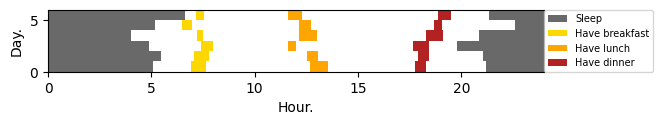

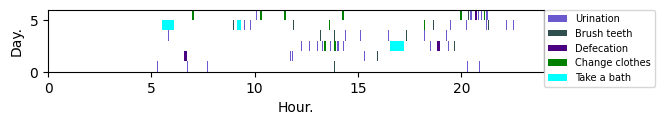

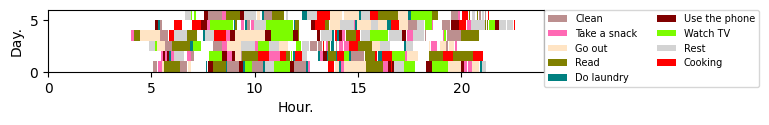

In [24]:
# construction rules
fundamental_act_names = set(
    [a.name for a in activity_model.basic_activity_model["fundamental_activities"]]
)
necessary_act_names = set(
    [a.name for a in activity_model.basic_activity_model["necessary_activities"]]
)
random_act_names = set(
    [a.name for a in activity_model.basic_activity_model["random_activities"]]
)
all_act_names = set([a.activity.name for a in AS])
utils.save_activity_sequence_as_image(
    data_save_path,
    AS,
    show=True,
    file_name="fundamental_acts",
    aspect_ratio=0.5,
    swap_axies=True,
    ncol=1,
    mask_activities=list(all_act_names - fundamental_act_names),
)
utils.save_activity_sequence_as_image(
    data_save_path,
    AS,
    show=True,
    file_name="necessary_acts",
    aspect_ratio=0.5,
    swap_axies=True,
    ncol=1,
    mask_activities=list(all_act_names - necessary_act_names),
)
utils.save_activity_sequence_as_image(
    data_save_path,
    AS,
    show=True,
    file_name="random_acts",
    aspect_ratio=0.5,
    swap_axies=True,
    ncol=2,
    mask_activities=list(all_act_names - random_act_names),
)

## Generate an activity sequence using applied activity models.

In [25]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())
start_day, end_day = 0, 6

# act_model = activity_model.applied_activity_model  # e.g., eating activity is divided into some sub activities
act_model = (
    activity_model.applied_activity_model_2
)  # e.g., urinations are apart from each other

AS = utils.generate_activity_sequence(
    start_day, end_day, path, original_act_model=act_model
)
print("An activity sequence was generated in {}[s]!".format(time.time() - temp_time))
for i, x in enumerate(AS[:5]):
    print("{} {}".format(i, x))

utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)

# !! time consuming !!
utils.save_activity_pie_chart(data_save_path, AS)
# !! time consuming !!

print(
    "The activity sequence was saved as a txt and figures in {}[s].".format(
        time.time() - temp_time
    )
)

An activity sequence was generated in 0.01203298568725586[s]!
0 <ActivityDataPoint> <Activity>Sleep from 0:00:00 to 3:49:17.234649 at Bed
1 <ActivityDataPoint> <Activity>Rest from 3:49:17.234649 to 4:14:54.354778 at Sofa
2 <ActivityDataPoint> <Activity>Watch TV from 4:14:54.354778 to 4:59:02.121442 at Sofa
3 <ActivityDataPoint> <Activity>Read from 4:59:02.121442 to 5:00:56.278451 at Desk_Chair
4 <ActivityDataPoint> <Activity>Take a bath from 5:00:56.278451 to 5:32:48.817432 at Bathroom_Door
The activity sequence was saved as a txt and figures in 7.921418190002441[s].


# Generate walking trajectories

## Generate resident's walking trajectories between activities, using a layout data and an activity sequence.

In [26]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

# generate an activity sequence (AS) and save it
AS = utils.generate_activity_sequence(
    0, 6, path, original_act_model=activity_model.basic_activity_model
)
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)
# utils.save_activity_pie_chart(data_save_path, AS)  # time consuming!
print("An activity sequence was generated in {}[s].".format(time.time() - temp_time))

# generate walking trajectories (WT) and save it
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = utils.generate_walking_trajectories(
    path,
    AS,
    indoor_movement.stride,
    indoor_movement.step_speed,
    indoor_movement.prefer_foot,
)
for x in WT[:10]:
    print(x)
print("Walking trajectories were generated in {}[s].".format(time.time() - temp_time))

# save the figures of walking trajectories
utils.save_layout(data_save_path, path, WT=WT)  # as a figure
utils.save_walking_trajectoires(data_save_path, WT)  # as a text

for i in range(5):  # each of first 5 trajectories
    utils.save_layout(
        data_save_path, path, WT=[WT[i]], filename="Layout_{}_wt".format(i)
    )  # i-th trajectories

An activity sequence was generated in 0.5243196487426758[s].
Making walking trajectories. 324 / 324.Completed!
<WalkingTrajectory> type: Direct from Bed (7:24:40.800013) to Dinner_Table_Chair (7:24:49.600013)
<WalkingTrajectory> type: Direct from Dinner_Table_Chair (7:27:50.867900) to Bathroom_Door (7:27:54.067900)
<WalkingTrajectory> type: Direct from Bathroom_Door (7:30:00.253740) to Desk_Chair (7:30:07.453740)
<WalkingTrajectory> type: Direct from Desk_Chair (7:34:16.415817) to Toilet_Door (7:34:22.015817)
<WalkingTrajectory> type: Direct from Toilet_Door (7:37:23.056582) to Entrance (7:37:30.256582)
<WalkingTrajectory> type: Direct from Entrance (7:43:09.254260) to Dinner_Table_Chair (7:43:14.854260)
<WalkingTrajectory> type: stop from Dinner_Table_Chair (8:19:08.951230) to Dinner_Table_Chair (8:19:08.951230)
<WalkingTrajectory> type: Direct from Dinner_Table_Chair (8:24:22.079014) to Kitchen_Stove (8:24:29.279014)
<WalkingTrajectory> type: Direct from Kitchen_Stove (8:27:30.112478

# Arrange sensors in a layout

### Arrange passive infrared (PIR) sensors and pressure sensors randomly

<Sensor>normal PIR(#0)(61.43, -13.16)


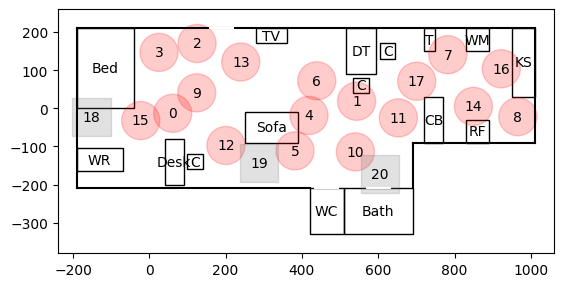

In [27]:
path = Path(layout_data_path / "test_layout")
sensors = sensor_model.generate_test_sensor_arrange(
    path, th_discomfort=90, num_PIR=18, num_pressure=3, min_d=80.0, max_iter=1000
)
print(sensors[0])
utils.save_layout(path, path, sensors=sensors, show=True)

## Arrange sensors by manually

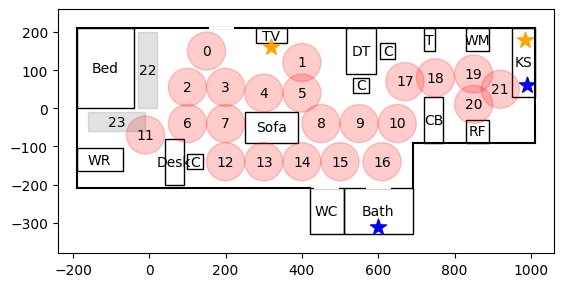

In [28]:
path = Path(layout_data_path / "test_layout")
sensors = (
    sensor_model.test_sensors
)  # Manually made sensor arrangement for ``test_layout``
utils.save_layout(path, path, sensors=sensors, show=True)

# Simulate sensor data by walking trajectories

In [2]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

# generate an activity sequence (AS)
AS_model = activity_model.basic_activity_model
AS = utils.generate_activity_sequence(0, 14, path, original_act_model=AS_model)
print("Activity sequence was generated in {}[s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)
# utils.save_activity_pie_chart(data_save_path, AS)  !! time consuming !!

# generate walking trajectories (WT)
WT_model = activity_model.indoor_movement  # parameters about walking
WT = utils.generate_walking_trajectories(
    path, AS, WT_model.stride, WT_model.step_speed, WT_model.prefer_foot
)
print("Walking trajectories was generated in {}[s].".format(time.time() - temp_time))
utils.save_walking_trajectoires(data_save_path, WT)

# sensor arrangement
sensors = sensor_model.test_sensors  # for the test_layout

# save various figures
PIR_sensors = [s for s in sensors if isinstance(s, sensor_model.CircularPIRSensor)]
pressure_sensors = [
    s for s in sensors if isinstance(s, sensor_model.SquarePressureSensor)
]
utils.save_layout(data_save_path, path, WT=WT)  # only walking trajectories
utils.save_layout(data_save_path, path, sensors=PIR_sensors)  # only PIR sensors
utils.save_layout(
    data_save_path, path, sensors=pressure_sensors
)  # only pressure sensors
utils.save_layout(data_save_path, path, sensors=sensors)  # all sensors
utils.save_layout(
    data_save_path, path, sensors=sensors, WT=WT
)  # all sensors and walking trajectories
utils.save_layout(
    data_save_path, path, sensors=sensors, WT=[WT[0]], filename="Layout_first_wt"
)  # all sensors and first trajectories

# simulate sensor data that is related with resident's move
motion_sensor_data = utils.generate_motion_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=0.1,
    sync_reference_point=AS[0].start,
    body_radius=WT_model.body_radius,
)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
for x in motion_sensor_data[:5]:
    print(x)
utils.save_binary_sensor_data(
    data_save_path, sensors, motion_sensor_data, filename="PIR_pressure"
)  # as a text

# simulate cost sensor data that is related with the home appliances
cost_sensor_data = utils.generate_cost_sensor_data(
    sensors, AS, WT, sampling_seconds=1, sync_reference_point=AS[0].start
)
utils.save_binary_sensor_data(
    data_save_path, sensors, cost_sensor_data, filename="cost"
)

# save all sensor data
sorted_sensor_data = sorted(motion_sensor_data + cost_sensor_data, key=lambda x: x[0])
utils.save_binary_sensor_data(
    data_save_path, sensors, motion_sensor_data + cost_sensor_data
)

# save data as .pickle
FP = floor_plan.FloorPlan()
FP.load_layout(path)
utils.pickle_dump(data_save_path, "FP", FP)
utils.pickle_dump(data_save_path, "FP", FP)
utils.pickle_dump(data_save_path, "AS_model", AS_model)
utils.pickle_dump(data_save_path, "AS", AS)
utils.pickle_dump(data_save_path, "WT_model", WT_model)
utils.pickle_dump(data_save_path, "WT", WT)
utils.pickle_dump(data_save_path, "SD_model", sensors)
utils.pickle_dump(data_save_path, "SD", sorted_sensor_data)

print("Finished ({}[s])".format(time.time() - temp_time))

Activity sequence was generated in 0.02044534683227539[s].
Making walking trajectories. 700 / 700.Completed!
Walking trajectories was generated in 3.251406669616699[s].
Motion sensor data was simulated in 24.687859773635864[s].
(datetime.timedelta(seconds=17747, microseconds=300000), 22, True)
(datetime.timedelta(seconds=17748, microseconds=100000), 22, False)
(datetime.timedelta(seconds=17748, microseconds=300000), 2, True)
(datetime.timedelta(seconds=17749, microseconds=700000), 3, True)
(datetime.timedelta(seconds=17750), 2, False)
Finished (28.767760753631592[s]) 21:22:00 / 14 days, 0:00:00.


# Anomalies simulation

Anomalies
- Being housebound
- Being semi-bedridden
- Wandering
- Falling (falling while walking)
- FallingHP (means falling from a High Place like bed)
- Forgetting

Hidden variables
- Mini-mental state examination (MMSE) score

## Mini-mental state examination (MMSE) score as a hidden variable

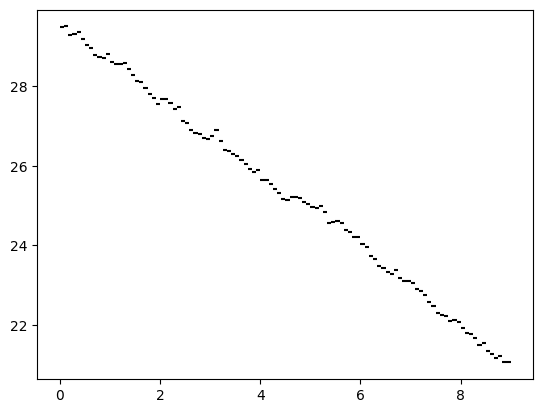

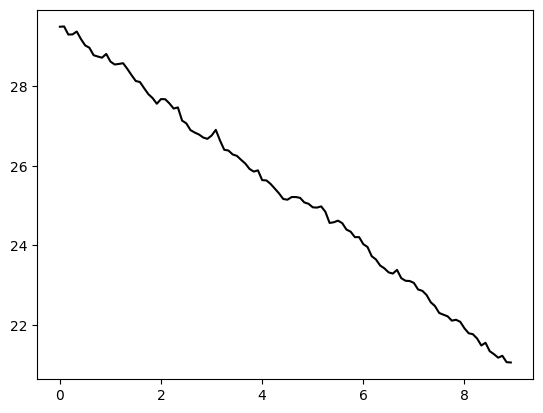

In [30]:
from numpy.random import normal

start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)

graph_time_step = timedelta(days=360)
for s, e, mmse in MMSE:
    plt.hlines(y=mmse, xmin=s / graph_time_step, xmax=e / graph_time_step, color="k")
plt.show()
plt.close()

graph_time_step = timedelta(days=360)
plt.plot([x[0] / graph_time_step for x in MMSE], [x[2] for x in MMSE], color="k")
plt.show()
plt.close()

## Being housebound and being semi-bedridden

### Simulate labels of being housebound and being semi-bedridden

hosuebound_labels[0]: (datetime.timedelta(days=410), datetime.timedelta(days=423, seconds=81215, microseconds=638968))
semi_bedridden_labels[0]: (datetime.timedelta(days=1054), datetime.timedelta(days=1081, seconds=62929, microseconds=640621))


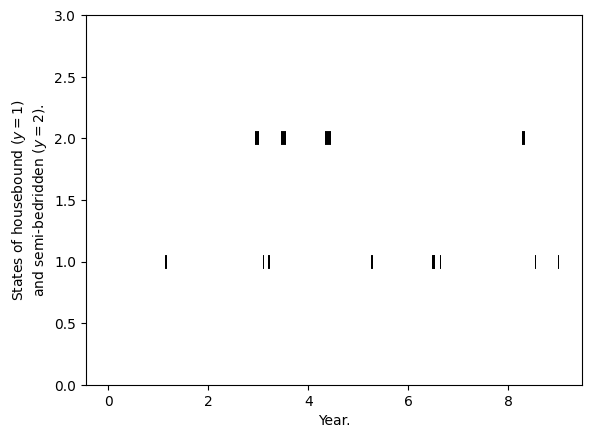

In [31]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)
anomaly_model.save_MMSE(data_save_path, MMSE)

# housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly_model.simulate_state_anomaly_periods(
    MMSE, 1 / 10, 14, 14 / 5
)
print("hosuebound_labels[0]: {}".format(housebound_labels[0]))

# semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly_model.simulate_state_anomaly_periods(
    MMSE, 1 / 20, 30, 30 / 5
)
print("semi_bedridden_labels[0]: {}".format(semi_bedridden_labels[0]))

# plot
graph_time_step = timedelta(days=360)
point_0, point_last = (timedelta(days=0), timedelta(days=0)), (
    timedelta(days=MMSE[-1][1].days),
    timedelta(days=MMSE[-1][1].days),
)
graph_housebound = deepcopy(housebound_labels)
graph_semi_bedridden = deepcopy(semi_bedridden_labels)
for p in [point_0, point_last]:
    graph_housebound.append(p)
    graph_semi_bedridden.append(p)
plt.xlabel("Year.")
plt.ylabel("States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).")
plt.ylim(0, 3)
for interval in graph_housebound:
    plt.hlines(
        1,
        interval[0] / graph_time_step,
        interval[1] / graph_time_step,
        color="black",
        linewidth=10.0,
    )
for interval in graph_semi_bedridden:
    plt.hlines(
        2,
        interval[0] / graph_time_step,
        interval[1] / graph_time_step,
        color="black",
        linewidth=10.0,
    )
plt.savefig(
    str(data_save_path) + "/labels_of_being_housebound_and_semi_bedridden.png", dpi=500
)
plt.show()
plt.close()

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_housebound_labels(data_save_path, housebound_labels)
anomaly_model.save_housebound_labels(
    data_save_path, semi_bedridden_labels, "semi_bedridden_labels"
)

### Simulate an activity sequence with being housebound and semi-bedridden

An activity sequence was generated in 0.43928956985473633 [s].


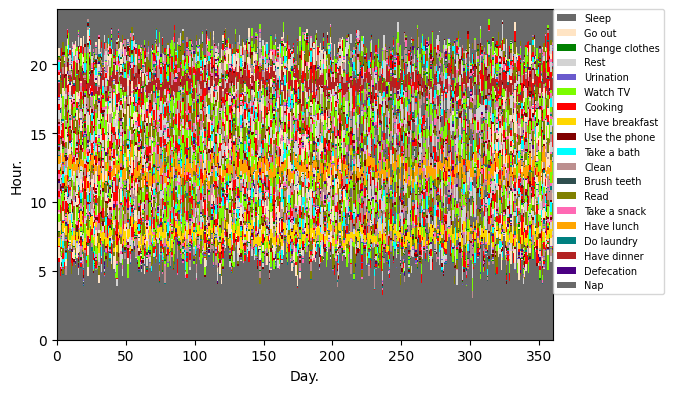

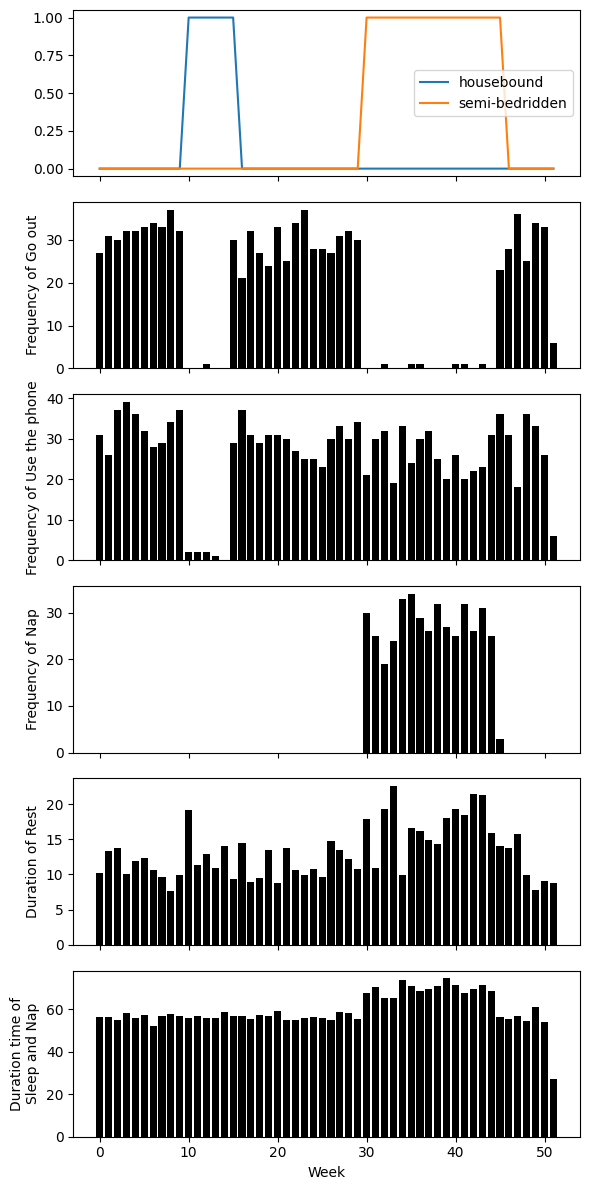

Finished (21.448574542999268[s])


In [32]:
temp_time = time.time()

# parameters that is changed and fixed while the resident is being housebound or semi-bedridden.
anomaly_parameters = {
    "housebound_go_out_num": 1 / 14,
    "housebound_go_out_duration": 20,
    "housebound_use_the_phone_num": 1 / 3,
    "housebound_use_the_phone_duration": 10,
    "semi_bedridden_nap_duration": 40,
    "semi_bedridden_rest_duration": 60,
    "semi_bedridden_go_out_num": 1 / 14,
    "semi_bedridden_go_out_duration": 20,
}


# ------------------------------------------------------------------------------
housebound_labels = [
    (timedelta(days=7 * 10), timedelta(days=7 * 15))
]  # !! test setting !!
semi_bedridden_labels = [
    (timedelta(days=7 * 30), timedelta(days=7 * 45))
]  # !! test setting !!
anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_housebound_labels(data_save_path, housebound_labels)
anomaly_model.save_housebound_labels(
    data_save_path, semi_bedridden_labels, "semi_bedridden_labels"
)
anomaly_model.save_anomaly_parameters(data_save_path, anomaly_parameters)
# ------------------------------------------------------------------------------


# generate an activity sequence (AS)
state_anomaly_labels = {
    anomaly_model.BEING_HOUSEBOUND: housebound_labels,
    anomaly_model.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels,
}
act_model = activity_model.basic_activity_model
AS = utils.generate_activity_sequence(
    0,
    360,
    path,
    original_act_model=act_model,
    state_anomaly_labels=state_anomaly_labels,
    anomaly_parameters=anomaly_parameters,
)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(
    data_save_path, AS, show=True, aspect_ratio=10
)  # time consuming!

# graph
step = timedelta(days=7)
x_label = "Week"

# activity information related to being housebound and being semi-bedridden
x_list = list(np.arange(len(list(utils.date_generator(AS[0].start, AS[-1].end, step)))))
go_out_freq = analysis.generate_block_time_histogram_of_activities(
    AS, [activity_model.go_out.name], step, target="frequency"
)
use_the_phone_freq = analysis.generate_block_time_histogram_of_activities(
    AS, [activity_model.use_the_phone.name], step, target="frequency"
)
nap_freq = analysis.generate_block_time_histogram_of_activities(
    AS, [activity_model.nap.name], step, target="frequency"
)
rest_duration = analysis.generate_block_time_histogram_of_activities(
    AS, [activity_model.rest.name], step, target="duration"
)
sleep_and_nap_duration = analysis.generate_block_time_histogram_of_activities(
    AS, [activity_model.sleep.name, activity_model.nap.name], step, target="duration"
)

housebound_state, semi_bedridden_state = [], []
for x in x_list:
    is_housebound, is_semi_bedridden = False, False
    for t in housebound_labels:
        if t[0] <= x * step <= t[1]:
            is_housebound = True
            break
    for t in semi_bedridden_labels:
        if t[0] <= x * step <= t[1]:
            is_semi_bedridden = True
            break
    housebound_state.append(int(is_housebound))
    semi_bedridden_state.append(int(is_semi_bedridden))

# graph
fig, ax = plt.subplots(6, 1, sharex="all", facecolor="w", figsize=(6, 12))

ax[0].plot(x_list, housebound_state, color="tab:blue", label="housebound")
ax[0].plot(x_list, semi_bedridden_state, color="tab:orange", label="semi-bedridden")
ax[0].legend()

ax[1].bar(x_list, go_out_freq, color="black")
ax[1].set_ylabel("Frequency of Go out")
ax[2].bar(x_list, use_the_phone_freq, color="black")
ax[2].set_ylabel("Frequency of Use the phone")
ax[3].bar(x_list, nap_freq, color="black")
ax[3].set_ylabel("Frequency of Nap")
ax[4].bar(x_list, rest_duration, color="black")
ax[4].set_ylabel("Duration of Rest")
ax[5].bar(x_list, sleep_and_nap_duration, color="black")
ax[5].set_ylabel("Duration time of\nSleep and Nap")
ax[5].set_xlabel(x_label)
plt.tight_layout()
plt.savefig(str(data_save_path) + "/block_time_histogram.png", dpi=100)
plt.show()
plt.close()

print("Finished ({}[s])".format(time.time() - temp_time))

## Wandering

### Simulate statistics of frequency and mean duration of wandering in each period.

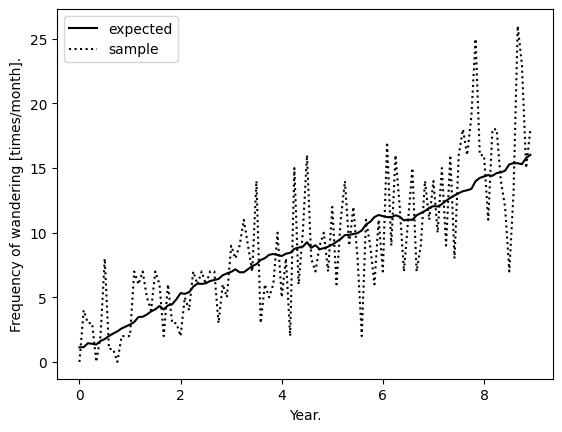

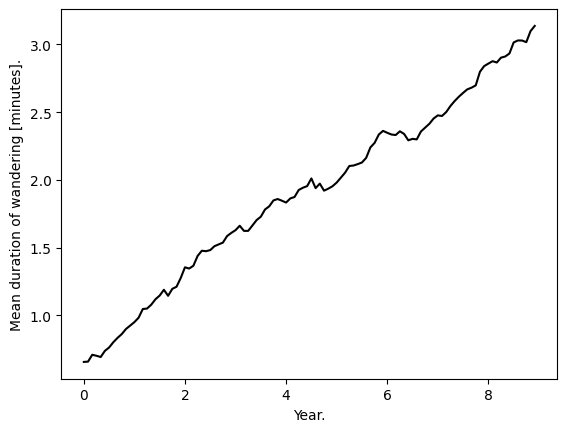

In [36]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)


def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -1.86 * mmse + 56


def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -0.31 * mmse + 9.8


wandering_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_wandering_mean_num
)
wandering_num = [
    (x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in wandering_mean_num
]
wandering_mean_minutes = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_wandering_mean_minutes
)

# graph
graph_time_step = timedelta(days=360)
plt.plot(
    [x[0] / graph_time_step for x in wandering_mean_num],
    [x[2] for x in wandering_mean_num],
    color="k",
    label="expected",
)
plt.plot(
    [x[0] / graph_time_step for x in wandering_num],
    [x[2] for x in wandering_num],
    color="k",
    linestyle="dotted",
    label="sample",
)
plt.xlabel("Year.")
plt.ylabel("Frequency of wandering [times/month].")
plt.legend()
plt.savefig(str(data_save_path) + "/frequency_of_wandering.png", dpi=100)
plt.show()
plt.close()

plt.plot(
    [x[0] / graph_time_step for x in wandering_mean_minutes],
    [x[2] for x in wandering_mean_minutes],
    color="k",
)
plt.xlabel("Year.")
plt.ylabel("Mean duration of wandering [minutes].")
plt.savefig(str(data_save_path) + "/mean_duration_of_wandering.png", dpi=100)
plt.show()
plt.close()

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_MMSE(data_save_path, wandering_num, "wandering_num")
anomaly_model.save_MMSE(
    data_save_path, wandering_mean_minutes, "wandering_mean_minutes"
)

### Simulate activity sequence with wandering

In [37]:
temp_time = time.time()


# ------------------------------------------------------------------------------------
wandering_num = [(x[0], x[1], x[2] + 30) for x in wandering_num]  # !! test setting !!
wandering_mean_minutes = [
    (x[0], x[1], x[2] + 1.5) for x in wandering_mean_minutes
]  # !! test setting !!
# ------------------------------------------------------------------------------------


# parameters that is changed and fixed while the resident is being housebound or semi-bedridden
anomaly_parameters = {
    "wandering_num": wandering_num,
    "wandering_minute": wandering_mean_minutes,
}

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_MMSE(data_save_path, wandering_num, "wandering_num")
anomaly_model.save_MMSE(
    data_save_path, wandering_mean_minutes, "wandering_mean_minutes"
)
anomaly_model.save_anomaly_parameters(data_save_path, anomaly_parameters)

# generate an activity sequence (AS)
AS = utils.generate_activity_sequence(
    0,
    6,
    path,
    original_act_model=activity_model.basic_activity_model,
    anomaly_parameters=anomaly_parameters,
)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement
WT = utils.generate_walking_trajectories(
    path,
    AS,
    indoor_movement.stride,
    indoor_movement.step_speed,
    indoor_movement.prefer_foot,
)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
utils.save_walking_trajectoires(data_save_path, WT)

# results of anomalies
wandering_result = []
for i, act in enumerate(AS):
    if act.activity.name == activity_model.wandering.name:
        wandering_result.append(i)
print("Total number of wanderings: {})".format(len(wandering_result)))

for i, wt in enumerate(WT):
    if wt.walking_type == utils.WANDERING_WALKING:
        print(
            "index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(
                i,
                wt.start_time,
                wt.end_time,
                (wt.end_time - wt.start_time) / timedelta(minutes=1),
            )
        )
        utils.save_layout(
            data_save_path, path, WT=[wt], filename="{}-th wandering".format(i)
        )

print("Finished ({}[s])".format(time.time() - temp_time))

anomaly_model.save_wandering_labels(data_save_path, WT)

An activity sequence was generated in 0.01723456382751465 [s].
Making walking trajectories. 314 / 314.Completed!
Walking trajectories were generated in 1.831399917602539 [s].
Total number of wanderings: 4)
index: 0057, start: 1 day, 7:12:27.370547, end: 1 day, 7:14:06.570547, duration: 1.65[m].
index: 0151, start: 2 days, 22:30:53.171248, end: 2 days, 22:32:41.171248, duration: 1.80[m].
index: 0222, start: 4 days, 8:16:17.787142, end: 4 days, 8:17:58.587142, duration: 1.68[m].
index: 0253, start: 4 days, 16:16:30.813957, end: 4 days, 16:18:28.413957, duration: 1.96[m].
Finished (2.8085501194000244[s])


### Simulate sensor data with wandering

In [38]:
sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = utils.generate_motion_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=0.1,
    sync_reference_point=AS[0].start,
    body_radius=10,
)
print("Sensor data was simulated in {}[s].".format(time.time() - temp_time))

utils.save_binary_sensor_data(
    data_save_path, sensors, motion_sensor_data, filename="PIR_pressure"
)

# save figures of wanderings
for i, wt in enumerate(WT):
    if wt.walking_type == utils.WANDERING_WALKING:
        print(
            "index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(
                i,
                wt.start_time,
                wt.end_time,
                (wt.end_time - wt.start_time) / timedelta(minutes=1),
            )
        )
        utils.save_layout(
            data_save_path,
            path,
            sensors=sensors,
            WT=[wt],
            filename="Sensor and {}-th wandering".format(i),
        )
        wt.save_with_sensor_activations(
            data_save_path,
            "sensor_activation_in_{}-th_wandering".format(i),
            motion_sensor_data,
        )

Sensor data was simulated in 26.614399194717407[s].
index: 0057, start: 1 day, 7:12:27.370547, end: 1 day, 7:14:06.570547, duration: 1.65[m].
index: 0151, start: 2 days, 22:30:53.171248, end: 2 days, 22:32:41.171248, duration: 1.80[m].
index: 0222, start: 4 days, 8:16:17.787142, end: 4 days, 8:17:58.587142, duration: 1.68[m].
index: 0253, start: 4 days, 16:16:30.813957, end: 4 days, 16:18:28.413957, duration: 1.96[m].


## Falls while walking and falls while standing

### Statistics of frequency and mean duration of falls in each period

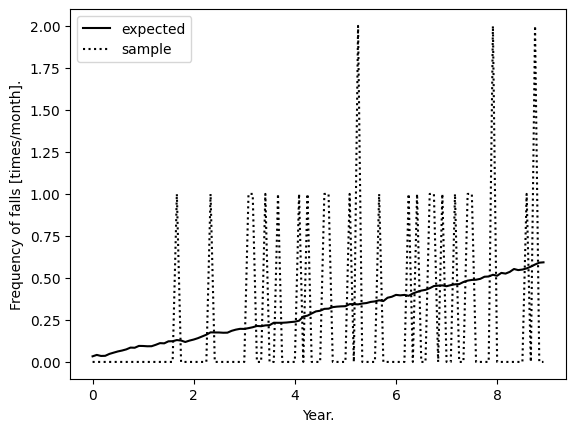

In [40]:
path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)


def calculate_falling_mean_num(mmse):
    # decide the mean number of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -mmse / 15 + 2


# falling while walking
fall_w_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_falling_mean_num
)
fall_w_num = [(x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in fall_w_mean_num]

# fall while standing
fall_s_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_falling_mean_num
)
fall_s_num = [(x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in fall_s_mean_num]

# graph
graph_time_step = timedelta(days=360)
plt.plot(
    [x[0] / graph_time_step for x in fall_w_mean_num],
    [x[2] for x in fall_w_mean_num],
    color="k",
    label="expected",
)
plt.plot(
    [x[0] / graph_time_step for x in fall_w_num],
    [x[2] for x in fall_w_num],
    color="k",
    linestyle="dotted",
    label="sample",
)
plt.xlabel("Year.")
plt.ylabel("Frequency of falls [times/month].")
plt.legend()
plt.savefig(str(data_save_path) + "/frequency_of_falls.png", dpi=300)
plt.show()
plt.close()

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_MMSE(data_save_path, fall_w_num, "fall_w_num")
anomaly_model.save_MMSE(data_save_path, fall_s_num, "fall_s_num")

### Simulate walking trajectories with falls

In [41]:
temp_time = time.time()

# ------------------------------------------------------------------------------------
fall_w_num = [(x[0], x[1], x[2] + 2) for x in fall_w_num]  # !! test setting !!
fall_s_num = [(x[0], x[1], x[2] + 2) for x in fall_s_num]  # !! test setting !!
# ------------------------------------------------------------------------------------

# fall_s_info['place'] defines the places that a resident may fall from high place
fall_s_place_bed = ["Bed"]
fall_s_place = ["Bed", "Sofa", "Dinner_Table_Chair", "Desk_Chair"]

fall_w_parameters = {"num": fall_w_num, "mean_lie_down_seconds": 30}
fall_s_parameters = {
    "num": fall_s_num,
    "mean_lie_down_seconds": 30,
    "place": fall_s_place_bed,
}

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_anomaly_parameters(
    data_save_path, fall_w_parameters, "fall_w_parameters"
)
anomaly_model.save_anomaly_parameters(
    data_save_path, fall_s_parameters, "fall_s_parameters"
)

# generate an activity sequence (AS)
AS = utils.generate_activity_sequence(
    0, 6, path, original_act_model=activity_model.basic_activity_model
)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement
WT = utils.generate_walking_trajectories(
    path,
    AS,
    indoor_movement.stride,
    indoor_movement.step_speed,
    indoor_movement.prefer_foot,
    fall_w_parameters=fall_w_parameters,
    fall_s_parameters=fall_s_parameters,
)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))
utils.save_walking_trajectoires(data_save_path, WT)
anomaly_model.save_fall_labels(data_save_path, WT)

# save figures of walking trajectories with falls
print("Path that a fall while walking and a fall while standing both occurr: ")
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        utils.save_layout(
            data_save_path, path, WT=[wt], filename="{}-th path".format(i)
        )
        print(
            "  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_w,
                wt.timestamp[wt.fall_w_index],
                wt.fall_w_index,
                wt.start_place,
                wt.end_place,
            )
        )
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print(
            "  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_s,
                wt.timestamp[wt.fall_s_index],
                wt.fall_s_index,
                wt.start_place,
                wt.end_place,
            )
        )
print("Path that a fall while walking occurrs: ")
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        utils.save_layout(
            data_save_path, path, WT=[wt], filename="{}-th path".format(i)
        )
        print(
            "  For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_w,
                wt.timestamp[wt.fall_w_index],
                wt.fall_w_index,
                wt.start_place,
                wt.end_place,
            )
        )
print("Path that a fall while standing occurrs: ")
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        utils.save_layout(
            data_save_path, path, WT=[wt], filename="{}-th path".format(i)
        )
        print(
            "  For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_s,
                wt.timestamp[wt.fall_s_index],
                wt.fall_s_index,
                wt.start_place,
                wt.end_place,
            )
        )

An activity sequence was generated in 0.013014554977416992 [s].
Making walking trajectories. 328 / 328.Completed!
Walking trajectories were generated in 1.6580374240875244 [s].
Path that a fall while walking and a fall while standing both occurr: 
Path that a fall while walking occurrs: 
  For 33.483817096201506 seconds from 3 days, 10:24:58.405666 at 1-th step during a path from Kitchen_Stove to Dinner_Table_Chair.
  For 26.91247038609613 seconds from 5 days, 6:56:35.718101 at 2-th step during a path from Toilet_Door to Sofa.
Path that a fall while standing occurrs: 
  For 33.0284897489702 seconds from 2 days, 4:13:41.774168 at 0-th step during a path from Bed to Entrance.
  For 35.53965259369057 seconds from 5 days, 6:43:42.465481 at 0-th step during a path from Bed to Entrance.


### Simulate sensor data with falls

In [42]:
temp_time = time.time()

sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = utils.generate_motion_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=0.1,
    sync_reference_point=AS[0].start,
    body_radius=10,
)
print("Sensor data was simulated in {}[s].".format(time.time() - temp_time))

# save the sensor data as a text file
utils.save_binary_sensor_data(
    data_save_path, sensors, motion_sensor_data, filename="PIR_pressure"
)

# save figures of falls
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_w at ({},{}) and fall_s at ({}, {})".format(
            i, w_c[0], w_c[1], s_c[0], s_c[1]
        )
        utils.save_layout(
            data_save_path,
            path,
            sensors=sensors,
            WT=[wt],
            filename=file_name,
            mark_point=[w_c, s_c],
        )
        wt.save_with_sensor_activations(
            data_save_path,
            "sensor_activation_in_{}-th_path".format(i),
            motion_sensor_data,
        )
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        w_c = (wt.centers[wt.fall_w_index][0], wt.centers[wt.fall_w_index][1])
        file_name = "{}-th path with fall_w at ({},{})".format(i, w_c[0], w_c[1])
        utils.save_layout(
            data_save_path,
            path,
            sensors=sensors,
            WT=[wt],
            filename=file_name,
            mark_point=[w_c],
        )
        wt.save_with_sensor_activations(
            data_save_path,
            "sensor_activation_in_{}-th_path".format(i),
            motion_sensor_data,
        )
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        s_c = (wt.centers[wt.fall_s_index][0], wt.centers[wt.fall_s_index][1])
        file_name = "{}-th path with fall_s at ({},{})".format(i, s_c[0], s_c[1])
        utils.save_layout(
            data_save_path,
            path,
            sensors=sensors,
            WT=[wt],
            filename=file_name,
            mark_point=[s_c],
        )
        wt.save_with_sensor_activations(
            data_save_path,
            "sensor_activation_in_{}-th_path".format(i),
            motion_sensor_data,
        )

print("Figures are saved in {}[s].".format(time.time() - temp_time))

Sensor data was simulated in 8.861831426620483[s].
Figures are saved in 10.614437580108643[s].


## Forgetting

### Statistics of frequency of forgettings in each period

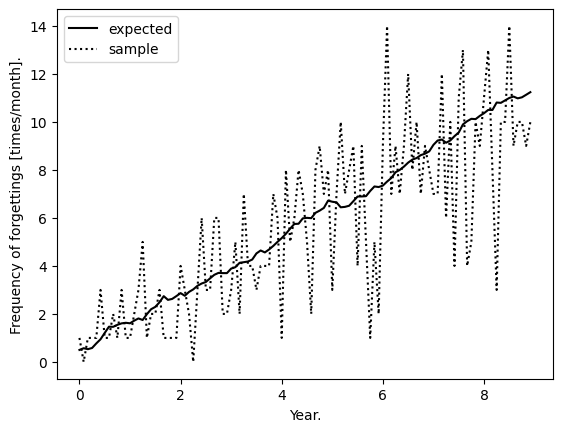

In [44]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)


def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting by MMSE
    return -mmse + 30


forgetting_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_forgetting_mean_num
)
forgetting_num = [
    (x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in forgetting_mean_num
]

# graph
graph_time_step = timedelta(days=360)
plt.plot(
    [x[0] / graph_time_step for x in forgetting_mean_num],
    [x[2] for x in forgetting_mean_num],
    color="k",
    label="expected",
)
plt.plot(
    [x[0] / graph_time_step for x in forgetting_num],
    [x[2] for x in forgetting_num],
    color="k",
    linestyle="dotted",
    label="sample",
)
plt.xlabel("Year.")
plt.ylabel("Frequency of forgettings [times/month].")
plt.legend()
plt.savefig(str(data_save_path) + "/frequency_of_forgettings.png", dpi=300)
plt.show()
plt.close()

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_MMSE(data_save_path, forgetting_num, "forgetting_num")

### Simulate sensor data with forgetting, using information generated in the above jupyter-notebook cell.

In [45]:
temp_time = time.time()


# ----------------------------------------------------------------------------------------
forgetting_num = [(x[0], x[1], 2) for x in forgetting_mean_num]  # !! test setting !!
# ----------------------------------------------------------------------------------------

anomaly_model.save_MMSE(data_save_path, MMSE)
anomaly_model.save_MMSE(data_save_path, forgetting_num, "forgetting_num")

path = Path(layout_data_path / "test_layout")

# generate an activity sequence (AS)
AS = utils.generate_activity_sequence(
    0, 10, path, original_act_model=activity_model.applied_activity_model_2
)
print("Activity sequence was generated in {}[s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)

# generate walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = utils.generate_walking_trajectories(
    path,
    AS,
    indoor_movement.stride,
    indoor_movement.step_speed,
    indoor_movement.prefer_foot,
)
print("Walking trajectories were generated in {}[s].".format(time.time() - temp_time))

# Activities that are candidates of forgetting
forgetting_activities_dict = {
    act.activity.name: act.activity.home_equipment
    for act in AS
    if act.activity.home_equipment != {}
}
print("Activities related with home appliances.")
pprint.pprint(forgetting_activities_dict)

# decide which activities are forgetting and how long the forgetting continues
forgetting_labels = anomaly_model.forgetting_labels(AS, WT, forgetting_num)
for x in forgetting_labels:
    print(
        "{} ({} - {}), forgetting: {}-th {}, notice: {}-th {} ".format(
            x[2], x[4], x[5], x[0], AS[x[0]].activity.name, x[1], AS[x[1]].activity.name
        )
    )
print("Forgetting label was simulated in {}[s].".format(time.time() - temp_time))
anomaly_model.save_forgetting_labels(data_save_path, forgetting_labels)

sensors = sensor_model.test_sensors  # for test_layout
cost_sensor_data = utils.generate_cost_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=1,
    sync_reference_point=AS[0].start,
    forgetting_labels=forgetting_labels,
)
utils.save_binary_sensor_data(
    data_save_path, sensors, cost_sensor_data, filename="cost"
)
print("Finished ({}[s])".format(time.time() - temp_time))

Activity sequence was generated in 0.025013208389282227[s].
Making walking trajectories. 565 / 565.Completed!
Walking trajectories were generated in 2.746466636657715[s].
Activities related with home appliances.
{'Brush teeth': {'water flow sensor in bathroom': 1},
 'Cooking': {'electric energy meter at kitchen': 1,
             'water flow sensor at kitchen': 1},
 'Take a bath': {'water flow sensor in bathroom': 1},
 'Watch TV': {'electric energy meter of TV': 1}}
electric energy meter at kitchen (14:52:32.635267 - 17:24:57.195405), forgetting: 31-th Cooking, notice: 42-th Cooking 
water flow sensor at kitchen (6 days, 16:22:31.300057 - 6 days, 17:29:19.496896), forgetting: 375-th Cooking, notice: 383-th Cooking 
Forgetting label was simulated in 2.748466730117798[s].
Finished (5.80159854888916[s]), 22:54:46 / 10 days, 0:00:00.


### Total cost of home equipments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


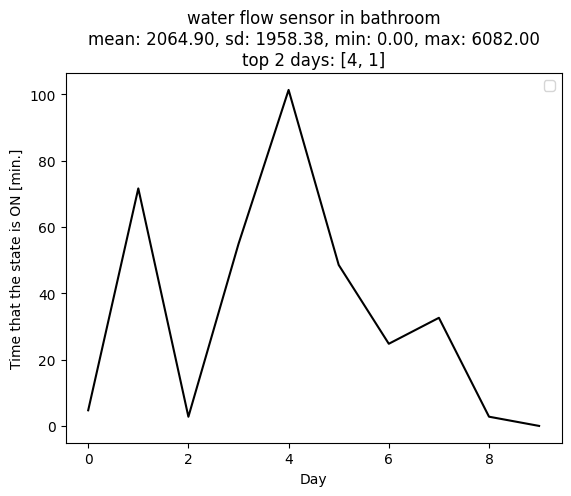

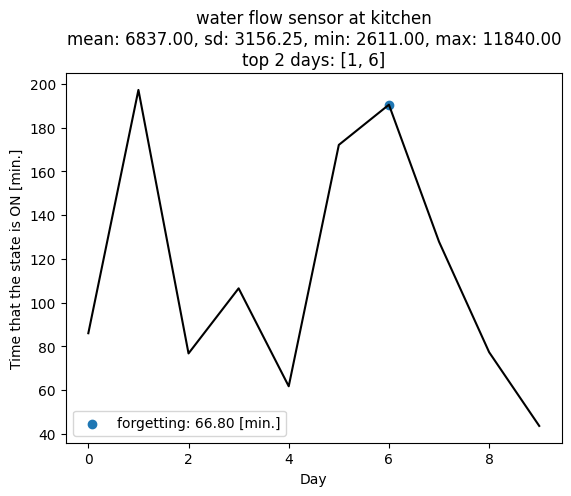

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


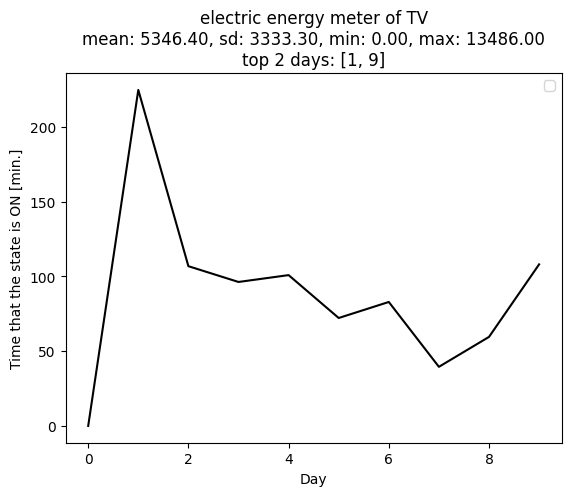

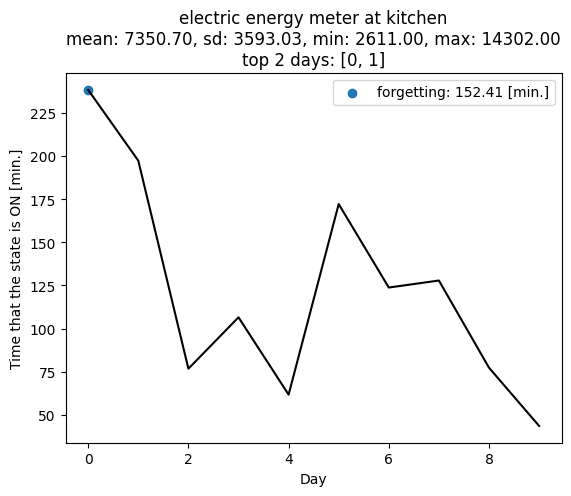

In [46]:
cost_step = timedelta(days=1)

# calculate the block histogram of cost
cost_dict = dict()
statistics_dict = dict()
topK_dict = dict()
K = 2
for s in sensors:
    if isinstance(s, sensor_model.CostSensor):
        seconds = np.array(
            analysis.generate_on_seconds_histogram(cost_sensor_data, s.index, cost_step)
        )
        cost_dict[s.name] = seconds
        statistics_dict[
            s.name
        ] = "mean: {:.2f}, sd: {:.2f}, min: {:.2f}, max: {:.2f}".format(
            seconds.mean(), np.sqrt(seconds.var()), seconds.min(), seconds.max()
        )
        topK_dict[s.name] = "top {} days: {}".format(
            K, analysis.top_K_cost(seconds, K=K)
        )

# plot
for k, values in cost_dict.items():
    file_name = "cost of {}".format(k)
    cost_min = [v / 60 for v in values]
    plt.plot(range(len(cost_min)), cost_min, color="black")
    for f in forgetting_labels:
        if f[2] == k:
            d = f[4].days
            plt.scatter(
                d,
                cost_min[d],
                label="forgetting: {:.2f} [min.]".format(
                    (f[5] - f[4]).total_seconds() / 60
                ),
            )
    plt.xlabel("Day")
    plt.ylabel("Time that the state is ON [min.]")
    plt.title(k + "\n" + statistics_dict[k] + "\n" + topK_dict[k])
    plt.legend()
    plt.savefig(data_save_path / Path(file_name), dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

## Six anomalies

### Statistics of all anomalies

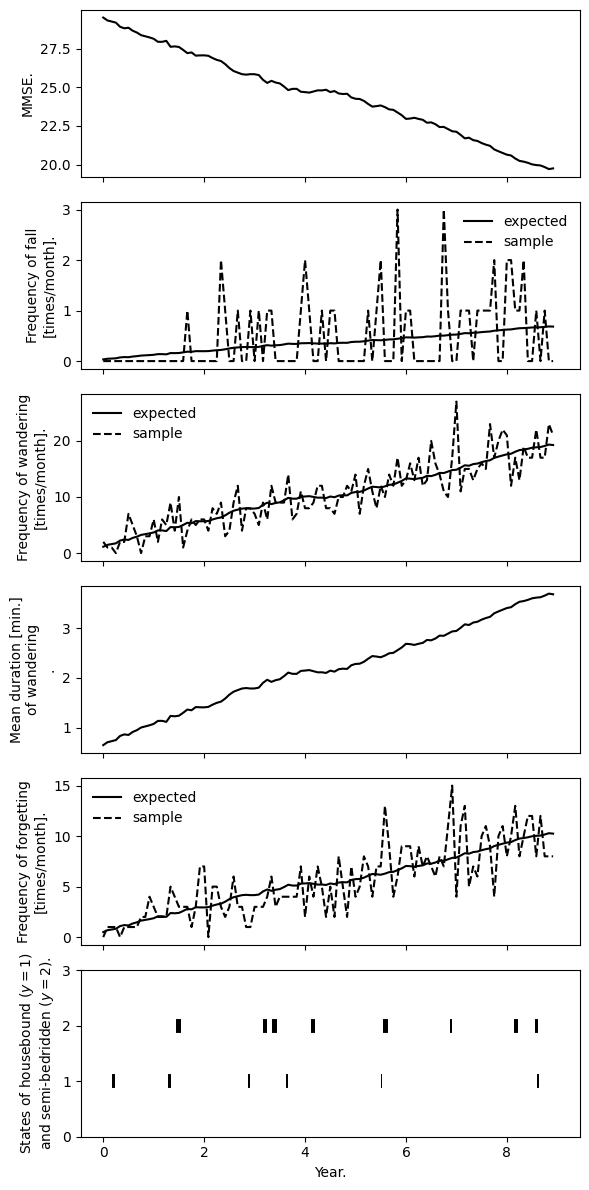

In [5]:
temp_time = time.time()

path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())

# MMSE score
start, end, step = timedelta(days=0), timedelta(days=9 * 360), timedelta(days=30)
MMSE = anomaly_model.simulate_MMSE(start, end, step, error_e=0)

# Housebound
# housebound_labels[i] = (start_time, end_time) of i-th being housebound
housebound_labels = anomaly_model.simulate_state_anomaly_periods(
    MMSE, 1 / 10, 14, 14 / 5
)

# Semi-bedridden
# semi_bedridden_labels[i] = (start_time, end_time) of i-th being semi-bedridden
semi_bedridden_labels = anomaly_model.simulate_state_anomaly_periods(
    MMSE, 1 / 20, 30, 30 / 5
)


# Wandering
def calculate_wandering_mean_num(mmse):
    # decide the mean frequency of wandering [times/month]
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -1.86 * mmse + 56


def calculate_wandering_mean_minutes(mmse):
    # decide the mean duration time [minutes] of wandering
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -0.31 * mmse + 9.8


wandering_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_wandering_mean_num
)
wandering_num = [
    (x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in wandering_mean_num
]
wandering_mean_minutes = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_wandering_mean_minutes
)


# Falls
def calculate_falling_mean_num(mmse):
    # decide the mean number [times/month] of falling
    if mmse < 0 or 30 < mmse:
        raise ValueError("mmse must be 0 <= mmse <= 30")
    return -mmse / 15 + 2


# falling while walking (fall_w)
fall_w_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_falling_mean_num
)
fall_w_num = [(x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in fall_w_mean_num]
# fall while standing (fall_s)
fall_s_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_falling_mean_num
)
fall_s_num = [(x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in fall_s_mean_num]


# Forgetting
def calculate_forgetting_mean_num(mmse):
    # This returns the mean number of forgetting [times/month] by MMSE
    return -mmse + 30


forgetting_mean_num = anomaly_model.simulate_values_from_MMSE(
    MMSE, start, end, step, calculate_forgetting_mean_num
)
forgetting_num = [
    (x[0], x[1], scipy.stats.poisson.rvs(x[2])) for x in forgetting_mean_num
]


# Figures of anomalies
fig, ax = plt.subplots(6, 1, sharex="all", facecolor="w", figsize=(6, 12))
graph_list = [
    MMSE,
    fall_w_mean_num,
    wandering_mean_num,
    wandering_mean_minutes,
    forgetting_mean_num,
]
samples_list = [[], fall_w_num, wandering_num, [], forgetting_num]
label_ylabel_list = [
    "MMSE.",
    "Frequency of fall\n[times/month].",
    "Frequency of wandering\n[times/month].",
    "Mean duration [min.]\nof wandering\n.",
    "Frequency of forgetting\n[times/month].",
]
graph_time_step = timedelta(days=360)
for i, data in enumerate(zip(graph_list, samples_list, label_ylabel_list)):
    x, samples, label = data[0], data[1], data[2]
    ax[i].plot(
        [xx[0] / graph_time_step for xx in x],
        [xx[2] for xx in x],
        "k-",
        label="expected",
    )
    if i == 1 or i == 2 or i == 4:
        ax[i].plot(
            [xx[0] / graph_time_step for xx in samples],
            [xx[2] for xx in samples],
            "k--",
            label="sample",
        )
    ax[i].set_ylabel(label)
ax[1].legend(loc="best", frameon=False)
ax[2].legend(loc="best", frameon=False)
ax[4].legend(loc="best", frameon=False)
# ax[4].set_xlabel('Year.')

point_0, point_last = (timedelta(days=0), timedelta(days=0)), (
    timedelta(days=MMSE[-1][1].days),
    timedelta(days=MMSE[-1][1].days),
)
graph_housebound = deepcopy(housebound_labels)
graph_semi_bedridden = deepcopy(semi_bedridden_labels)
for p in [point_0, point_last]:
    graph_housebound.append(p)
    graph_semi_bedridden.append(p)
ax[5].set_xlabel("Year.")
ax[5].set_ylabel("States of housebound ($y = 1$)\nand semi-bedridden ($y = 2$).")
ax[5].set_ylim(0, 3)
for interval in graph_housebound:
    ax[5].hlines(
        1,
        interval[0] / graph_time_step,
        interval[1] / graph_time_step,
        color="black",
        linewidth=10.0,
    )
for interval in graph_semi_bedridden:
    ax[5].hlines(
        2,
        interval[0] / graph_time_step,
        interval[1] / graph_time_step,
        color="black",
        linewidth=10.0,
    )

plt.tight_layout()
plt.savefig(str(data_save_path) + "/anomaly_parameter_transitions.png", dpi=500)
plt.show()
plt.close()

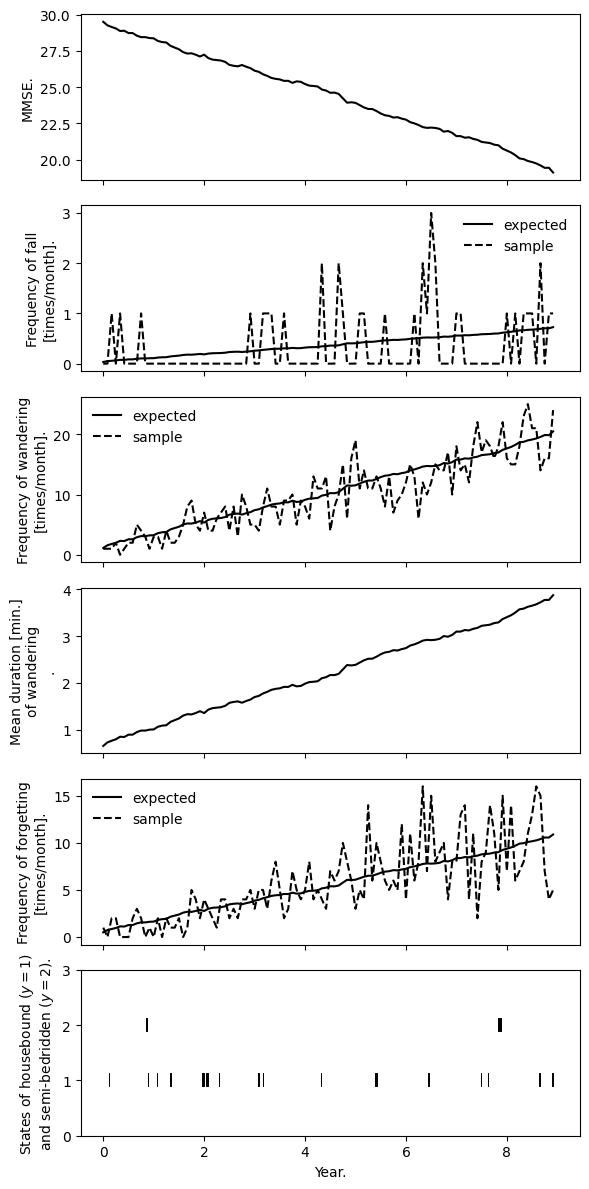

In [47]:
# short code under the test settings
path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())
anomaly_info = utils.generate_six_anomalies(path, data_save_path, 9 * 360)

### Simulate sensor data with multiple anomalies

In [6]:
# -----!! test setting for short days !!----------------------------------------------------
housebound_labels = [(timedelta(days=7 * 10), timedelta(days=7 * 15))]  # fixed
semi_bedridden_labels = [(timedelta(days=7 * 30), timedelta(days=7 * 45))]  # fixed
wandering_num = [(x[0], x[1], x[2] + 10) for x in wandering_num]  # + 10
wandering_mean_minutes = [
    (x[0], x[1], x[2] + 0.2) for x in wandering_mean_minutes
]  # + 0.2
fall_w_num = [(x[0], x[1], x[2] + 3) for x in fall_w_num]  # +3
fall_s_num = [(x[0], x[1], x[2] + 3) for x in fall_s_num]  # +3
forgetting_num = [(x[0], x[1], 3) for x in forgetting_mean_num]  # fixed
# ------------------------------------------------------------------------------------------


# fall_s_info['place'] defines the places that a resident may fall from high place
fall_s_place_bed = ["Bed"]
# fall_s_place = ['Bed', 'Sofa', 'Dinner_Table_Chair', 'Desk_Chair']
fall_w_parameters = {"num": fall_w_num, "mean_lie_down_seconds": 30}
fall_s_parameters = {
    "num": fall_s_num,
    "mean_lie_down_seconds": 30,
    "place": fall_s_place_bed,
}
anomaly_parameters = {
    "housebound_go_out_num": 1 / 14,
    "housebound_go_out_duration": 20,
    "housebound_use_the_phone_num": 1 / 3,
    "housebound_use_the_phone_duration": 10,
    "semi_bedridden_nap_duration": 40,
    "semi_bedridden_rest_duration": 60,
    "semi_bedridden_go_out_num": 1 / 14,
    "semi_bedridden_go_out_duration": 20,
    "wandering_num": wandering_num,
    "wandering_minute": wandering_mean_minutes,
}


# Activity sequence (AS)
state_anomaly_labels = {
    anomaly_model.BEING_HOUSEBOUND: housebound_labels,
    anomaly_model.BEING_SEMI_BEDRIDDEN: semi_bedridden_labels,
}
act_model = activity_model.basic_activity_model
AS = utils.generate_activity_sequence(
    0,
    10,
    path,
    original_act_model=act_model,
    state_anomaly_labels=state_anomaly_labels,
    anomaly_parameters=anomaly_parameters,
)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))
utils.save_activity_sequence(data_save_path, AS)
utils.save_activity_sequence_as_image(data_save_path, AS)


# Walking trajectories (WT)
indoor_movement = activity_model.indoor_movement  # parameters about walking
WT = utils.generate_walking_trajectories(
    path,
    AS,
    indoor_movement.stride,
    indoor_movement.step_speed,
    indoor_movement.prefer_foot,
    fall_w_parameters=fall_w_parameters,
    fall_s_parameters=fall_s_parameters,
)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))


# Motion sensor data
sensors = sensor_model.test_sensors  # for test_layout
motion_sensor_data = utils.generate_motion_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=0.1,
    sync_reference_point=AS[0].start,
    body_radius=10,
)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))
utils.save_binary_sensor_data(
    data_save_path, sensors, motion_sensor_data, filename="PIR_pressure"
)

# decide which activities are forgetting and how long the forgetting continues
forgetting_labels = anomaly_model.forgetting_labels(AS, WT, forgetting_num)
cost_sensor_data = utils.generate_cost_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=1,
    sync_reference_point=AS[0].start,
    forgetting_labels=forgetting_labels,
)
utils.save_binary_sensor_data(
    data_save_path, sensors, cost_sensor_data, filename="cost"
)
print("Cost sensor data was simulated in {}[s].".format(time.time() - temp_time))


# Results of anomalies
print("Results of anomalies---------------------------")

print("hosuebound_labels: {}".format(housebound_labels))

print("semi_bedridden_labels: {}".format(semi_bedridden_labels))

wandering_result = []
for i, act in enumerate(AS):
    if act.activity.name == activity_model.wandering.name:
        wandering_result.append(i)
print("Total number of wanderings: {})".format(len(wandering_result)))
for i, wt in enumerate(WT):
    if wt.walking_type == utils.WANDERING_WALKING:
        print(
            "index: {:04}, start: {}, end: {}, duration: {:.2f}[m].".format(
                i,
                wt.start_time,
                wt.end_time,
                (wt.end_time - wt.start_time) / timedelta(minutes=1),
            )
        )
        utils.save_layout(
            data_save_path,
            path,
            sensors=sensors,
            WT=[wt],
            filename="Sensor and {}-th wandering".format(i),
        )

print("Path that a fall while walking and a fall while standing both occurr: ")
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == True:
        print(
            "  w: For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_w,
                wt.timestamp[wt.fall_w_index],
                wt.fall_w_index,
                wt.start_place,
                wt.end_place,
            )
        )
        # print("{} == duration: {}".format(wt.lie_down_seconds_w, wt.timestamp[wt.fall_s_index + 1] - wt.timestamp[wt.fall_s_index]))
        print(
            "  s: For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_s,
                wt.timestamp[wt.fall_s_index],
                wt.fall_s_index,
                wt.start_place,
                wt.end_place,
            )
        )
print("Path that a fall while walking occurrs: ")
for i, wt in enumerate(WT):
    if wt.fall_w == True and wt.fall_s == False:
        print(
            "  For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_w,
                wt.timestamp[wt.fall_w_index],
                wt.fall_w_index,
                wt.start_place,
                wt.end_place,
            )
        )
print("Path that a fall while standing occurrs: ")
for i, wt in enumerate(WT):
    if wt.fall_w == False and wt.fall_s == True:
        print(
            "  For {} seconds from {} at {}-th step during a path from {} to {}.".format(
                wt.lie_down_seconds_s,
                wt.timestamp[wt.fall_s_index],
                wt.fall_s_index,
                wt.start_place,
                wt.end_place,
            )
        )
for x in forgetting_labels:
    print(
        "{} ({} - {}), forgetting: {}-th {}, notice: {}-th {} ".format(
            x[2], x[4], x[5], x[0], AS[x[0]].activity.name, x[1], AS[x[1]].activity.name
        )
    )

print("Finished ({}[s])".format(time.time() - temp_time))

# save labels of anomalies
anomaly_labels_path = data_save_path / Path("anomaly_labels")
if not os.path.exists(path):
    os.makedirs(path)
anomaly_model.save_MMSE(anomaly_labels_path, MMSE)
anomaly_model.save_MMSE(anomaly_labels_path, wandering_num, "wandering_num")
anomaly_model.save_MMSE(
    anomaly_labels_path, wandering_mean_minutes, "wandering_mean_minutes"
)
anomaly_model.save_anomaly_parameters(
    anomaly_labels_path, fall_w_parameters, "fall_w_parameters"
)
anomaly_model.save_anomaly_parameters(
    anomaly_labels_path, fall_s_parameters, "fall_s_parameters"
)
anomaly_model.save_MMSE(anomaly_labels_path, forgetting_num, "forgetting_num")
anomaly_model.save_housebound_labels(anomaly_labels_path, housebound_labels)
anomaly_model.save_housebound_labels(
    anomaly_labels_path, semi_bedridden_labels, "semi_bedridden_labels"
)
anomaly_model.save_wandering_labels(anomaly_labels_path, WT)
anomaly_model.save_fall_labels(anomaly_labels_path, WT)
anomaly_model.save_forgetting_labels(anomaly_labels_path, forgetting_labels)

An activity sequence was generated in 11.802096366882324 [s].
Making walking trajectories. 518 / 518.Completed!
Walking trajectories were generated in 14.678440809249878 [s].
Motion sensor data was simulated in 30.185933351516724[s].
Cost sensor data was simulated in 33.04958963394165[s].0:00.
Results of anomalies---------------------------
hosuebound_labels: [(datetime.timedelta(days=70), datetime.timedelta(days=105))]
semi_bedridden_labels: [(datetime.timedelta(days=210), datetime.timedelta(days=315))]
Total number of wanderings: 8)
index: 0040, start: 20:03:57.771968, end: 20:04:44.971968, duration: 0.79[m].
index: 0153, start: 3 days, 6:49:00.875361, end: 3 days, 6:49:34.475361, duration: 0.56[m].
index: 0311, start: 6 days, 13:16:30.911336, end: 6 days, 13:17:19.711336, duration: 0.81[m].
index: 0313, start: 6 days, 13:18:33.981754, end: 6 days, 13:19:17.981754, duration: 0.73[m].
index: 0360, start: 7 days, 10:06:50.445999, end: 7 days, 10:07:47.245999, duration: 0.95[m].
index: 

# Generate long-term sensor data

In [2]:
temp_time = time.time()
path = Path(layout_data_path / "test_layout")
data_save_path = utils.generate_data_folder(path, utils.present_date_and_time())


# floor plan (FP)
FP = floor_plan.FloorPlan()
FP.load_layout(path)
utils.pickle_dump(data_save_path, "FP", FP)


# models for Anomaly labels (AL)
anomaly_info = utils.generate_six_anomalies(path, data_save_path, 9 * 360, show=False)
fall_s_place_bed = ["Bed"]
fall_w_parameters = {"num": anomaly_info["fall_w_num"], "mean_lie_down_seconds": 30}
fall_s_parameters = {
    "num": anomaly_info["fall_s_num"],
    "mean_lie_down_seconds": 30,
    "place": fall_s_place_bed,
}
AL_model = {
    "housebound_go_out_num": 1 / 14,
    "housebound_go_out_duration": 20,
    "housebound_use_the_phone_num": 1 / 3,
    "housebound_use_the_phone_duration": 10,
    "semi_bedridden_nap_duration": 40,
    "semi_bedridden_rest_duration": 60,
    "semi_bedridden_go_out_num": 1 / 14,
    "semi_bedridden_go_out_duration": 20,
    "wandering_num": anomaly_info["wandering_num"],
    "wandering_minute": anomaly_info["wandering_mean_minutes"],
    "fall_w_parameters": fall_w_parameters,
    "fall_s_parameters": fall_s_parameters,
    "forgetting_num": anomaly_info["forgetting_num"],
}
utils.pickle_dump(data_save_path, "anomaly_model", AL_model)


# Activity sequence (AS)
start_days = 0
end_days = 9 * 360
state_anomaly_labels = {
    anomaly_model.BEING_HOUSEBOUND: anomaly_info["housebound_labels"],
    anomaly_model.BEING_SEMI_BEDRIDDEN: anomaly_info["semi_bedridden_labels"],
}
AS_model = activity_model.basic_activity_model
utils.pickle_dump(data_save_path, "AS_model", AS_model)
AS = utils.generate_activity_sequence(
    start_days,
    end_days,
    path,
    original_act_model=AS_model,
    state_anomaly_labels=state_anomaly_labels,
    anomaly_parameters=AL_model,
)
utils.save_activity_sequence(data_save_path, AS, file_name="AS")
utils.pickle_dump(data_save_path, "AS", AS)
print("An activity sequence was generated in {} [s].".format(time.time() - temp_time))


# Walking trajectories (WT)
WT_model = activity_model.indoor_movement  # parameters about walking
utils.pickle_dump(data_save_path, "WT_model", WT_model)
WT = utils.generate_walking_trajectories(
    path,
    AS,
    WT_model.stride,
    WT_model.step_speed,
    WT_model.prefer_foot,
    fall_w_parameters=AL_model["fall_w_parameters"],
    fall_s_parameters=AL_model["fall_s_parameters"],
)
utils.pickle_dump(data_save_path, "WT", WT)
print("Walking trajectories were generated in {} [s].".format(time.time() - temp_time))


# sensor data (SD)
sensors = sensor_model.test_sensors  # for test_layout
utils.pickle_dump(data_save_path, "SD_model", sensors)

motion_SD = utils.generate_motion_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=0.1,
    sync_reference_point=AS[0].start,
    body_radius=10,
)
print("Motion sensor data was simulated in {}[s].".format(time.time() - temp_time))

# decide which activities are forgot and how long the forgetting continues
forgetting_labels = anomaly_model.forgetting_labels(AS, WT, AL_model["forgetting_num"])
cost_SD = utils.generate_cost_sensor_data(
    sensors,
    AS,
    WT,
    sampling_seconds=1,
    sync_reference_point=AS[0].start,
    forgetting_labels=forgetting_labels,
)

sorted_sensor_data = sorted(motion_SD + cost_SD, key=lambda x: x[0])
utils.save_binary_sensor_data(
    data_save_path, sensors, sorted_sensor_data, filename="SD"
)
utils.pickle_dump(data_save_path, "SD", sorted_sensor_data)
print("Cost sensor data was simulated in {}[s].".format(time.time() - temp_time))


# Anomaly labels (AL)
AL = {}
AL[anomaly_model.MMSE] = anomaly_info["MMSE"]
AL[anomaly_model.BEING_HOUSEBOUND] = anomaly_info["housebound_labels"]
AL[anomaly_model.BEING_SEMI_BEDRIDDEN] = anomaly_info["semi_bedridden_labels"]
AL[anomaly_model.FORGETTING] = forgetting_labels
wandering_labels = []
fall_w_labels = []
fall_s_labels = []
for i, wt in enumerate(WT):
    if wt.walking_type == utils.WANDERING_WALKING:
        wandering_labels.append((i, wt.start_time, wt.end_time))
    if wt.fall_w:
        fall_w_labels.append(((wt.timestamp[wt.fall_w_index]), wt.lie_down_seconds_w))
    if wt.fall_s:
        fall_s_labels.append(((wt.timestamp[wt.fall_s_index]), wt.lie_down_seconds_s))
AL[anomaly_model.WANDERING] = wandering_labels
AL[anomaly_model.FALL_WHILE_WALKING] = fall_w_labels
AL[anomaly_model.FALL_WHILE_STANDING] = fall_s_labels
utils.pickle_dump(data_save_path, "AL", AL)

print("Finished ({}[s])".format(time.time() - temp_time))

An activity sequence was generated in 8.522196531295776 [s].
Making walking trajectories. 171926 / 171926.Completed!
Walking trajectories were generated in 767.1391916275024 [s].
Motion sensor data was simulated in 6589.413064956665[s].
Cost sensor data was simulated in 8211.358861923218[s]., 0:00:00.
Finished (8211.456380605698[s])
